# DORA Exploration de données

In [11]:
import pandas as pd
import folium
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from analyse import *
import time
import os

# Verfie si le notebook est executé sous VScode et configure matplotlib en fonction
try:
    os.environ['VSCODE_CWdD']
    %matplotlib widget
except KeyError:
    %matplotlib notebook

# Chemin pour acceder au fichier de données au format .xlsx (Excel)
FILE_PATH = "./data/ASSLacore-Séance1.xlsx"

df = pd.read_excel(FILE_PATH)
df.head() 

,Unnamed: 0,61f534215ee62b06a288c14d_pos_x,61f534215ee62b06a288c14d_pos_y,61f534215ee62b06a288c14d_ts,61f5343b5ee62b06a288c14e_pos_x,61f5343b5ee62b06a288c14e_pos_y,61f5343b5ee62b06a288c14e_ts,61f534845ee62b06a288c14f_pos_x,61f534845ee62b06a288c14f_pos_y,61f534845ee62b06a288c14f_ts,...,61f538115ee62b06a288c154_ts,61f53a565ee62b06a288c155_pos_x,61f53a565ee62b06a288c155_pos_y,61f53a565ee62b06a288c155_ts,61f53bd55ee62b06a288c156_pos_x,61f53bd55ee62b06a288c156_pos_y,61f53bd55ee62b06a288c156_ts,61f53d005ee62b06a288c157_pos_x,61f53d005ee62b06a288c157_pos_y,61f53d005ee62b06a288c157_ts
0,0,2.387223,48.893747,392210,2.388543,48.894083,306507,2.388087,48.893935,271105,...,91943,2.388518,48.894115,50565,2.388510,48.894047,68652,0,0,0
1,1,2.388502,48.894000,392441,2.388403,48.894118,306763,2.388525,48.893890,271868,...,92764,2.388465,48.894007,52448,2.388702,48.893930,68859,0,0,0
2,2,2.388477,48.894002,393431,2.388403,48.894118,306879,2.388525,48.893883,272869,...,93765,2.388467,48.894010,53448,2.388703,48.893937,69859,0,0,0
3,3,0.000000,0.000000,0,2.388403,48.894118,307750,2.388527,48.893882,273868,...,94770,2.388467,48.894007,54446,2.388718,48.893942,70856,0,0,0
4,4,0.000000,0.000000,0,2.388403,48.894118,307866,2.388528,48.893878,274868,...,95659,2.388467,48.894005,55446,2.388713,48.893962,71858,0,0,0


In [9]:

# Selectionner l'élève a analyser
STUDENT = "61f5343b5ee62b06a288c14e"

# Charger les données de latitude, longitude et timestamps dans un dataframe
sdf = df[[f"{STUDENT}_pos_y", f"{STUDENT}_pos_x", f"{STUDENT}_ts"]]
sdf = sdf.rename(columns={f"{STUDENT}_pos_y": "LAT", f"{STUDENT}_pos_x": "LONG", f"{STUDENT}_ts": "TS"})

# Enlever les derniers rangs pleins de zeros
sdf.drop(sdf[sdf.LAT == 0].index, inplace=True)

# Modifier la colone des timestamps pour avoir des temps relatif au premier point
sdf["TS"] = sdf["TS"] - sdf["TS"].min()

sdf

,LAT,LONG,TS
0,48.894083,2.388543,0
1,48.894118,2.388403,256
2,48.894118,2.388403,372
3,48.894118,2.388403,1243
4,48.894118,2.388403,1359
...,...,...,...
391,48.893820,2.388415,336374
392,48.893820,2.388415,337269
393,48.893820,2.388415,337385
394,48.893820,2.388415,338246


## Projection Equirectangulaire

Ici on convertit les données de latitude et longitude de chaque point en coordonnées (X;Y) dans un repère orthonormé. Les coordonnées (X;Y) permettent de faciliter les calcules notemment de distances par la suite. Puis ce que les points sont tous très proches les uns des autres relativement a la sufrace de la terre,le biais introduit par une projection Equirectangualire est negligeable.

,LAT,LONG,TS,X,Y
0,48.894083,2.388543,0,96.573319,115.753919
1,48.894118,2.388403,256,86.338448,119.645741
2,48.894118,2.388403,372,86.338448,119.645741
3,48.894118,2.388403,1243,86.338448,119.645741
4,48.894118,2.388403,1359,86.338448,119.645741


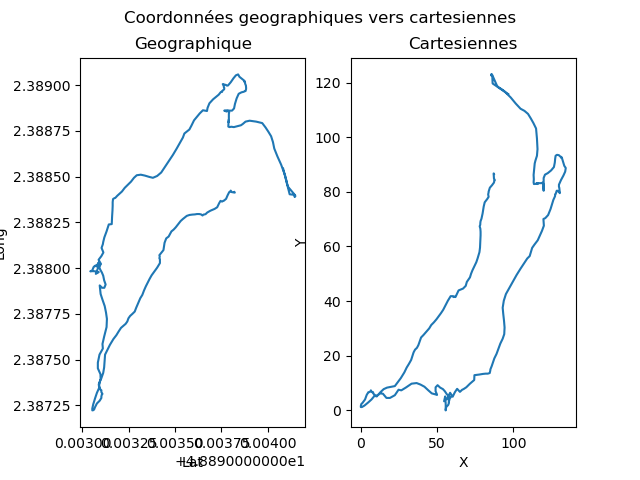

In [14]:
EARTH_RADIUS = 6371_000
def latlong_to_xy(lat, long):
    """
    Convert lat and long X, Y coordinates using Equirectangular projection
    lat: np 1d Array
    long: np 1d Array
    """
    lat, long = np.deg2rad(lat), np.deg2rad(long)
    std_lat = lat.mean()

    return EARTH_RADIUS * long * math.cos(std_lat), EARTH_RADIUS * lat

# Convert from lat/long to X/Y
sdf["X"], sdf["Y"] = latlong_to_xy(sdf[["LAT"]], sdf[["LONG"]])

# Set cartesian origins to the lowest values
sdf["X"] = sdf["X"] - sdf["X"].min()
sdf["Y"] = sdf["Y"] - sdf["Y"].min()

display(sdf.head())

fig, ax = plt.subplots(1, 2)
fig.suptitle("Coordonnées geographiques vers cartesiennes")
ax[0].plot(sdf["LAT"], sdf["LONG"])
ax[0].set_ylabel("Long")
ax[0].set_xlabel("Lat")
ax[0].set_title("Geographique")
ax[1].plot(sdf["X"], sdf["Y"])
ax[1].set_xlabel("X")
ax[1].set_ylabel("Y")
ax[1].set_title("Cartesiennes")

plt.show()


## Données brutes

,LAT,LONG,TS,X,Y,dist,dt,speed
0,48.894083,2.388543,0,96.573319,115.753919,NaN,NaN,NaN
1,48.894118,2.388403,256,86.338448,119.645741,10.949834,0.256,42.772789
2,48.894118,2.388403,372,86.338448,119.645741,0.000000,0.116,0.000000
3,48.894118,2.388403,1243,86.338448,119.645741,0.000000,0.871,0.000000
4,48.894118,2.388403,1359,86.338448,119.645741,0.000000,0.116,0.000000


Text(0.5, 1.0, 'Vitesse relative en fonction du temps')

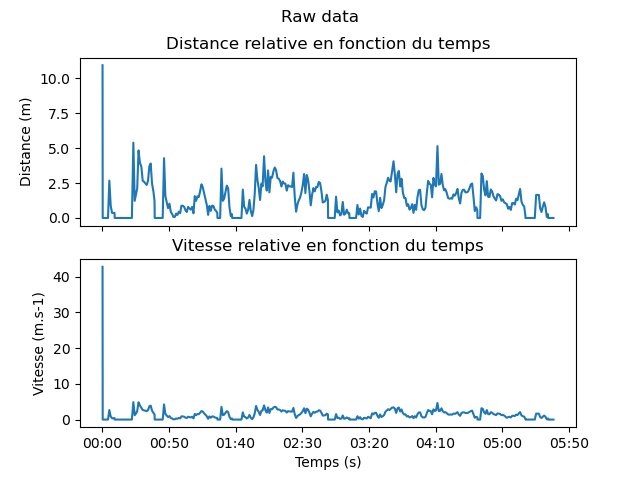

In [19]:
def dist(x1, y1, x2, y2):
    """
    Calcule la distance entre 2 points.
    Supporte la vectorisation.
    """
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

# Calcule la distances entre chaque points consecutifs (m)
sdf['dist'] = dist(sdf.loc[1:, 'X'], sdf.loc[1:, 'Y'], sdf["X"].shift(), sdf["Y"].shift())

# Calcule le temps écoulé entre chaques point consecutifs en secondes (s)
sdf['dt'] = (sdf.loc[1:, 'TS'] - sdf.TS.shift()) / 1000

# Calcule la vitesse entre chaques point consecutifs en metres par secondes (m.s-1)
sdf['speed'] = sdf['dist'] / sdf['dt']



display(sdf.head())

TIME_FORMATTER = matplotlib.ticker.FuncFormatter(lambda ms, x: time.strftime('%M:%S', time.gmtime(ms // 1000)))

# Draw the plots
fig, ax = plt.subplots(2, 1, sharex=True)
fig.suptitle("Raw data")
ax[0].xaxis.set_major_formatter(TIME_FORMATTER)
ax[0].plot(sdf['TS'], sdf['dist'])
ax[0].set_ylabel("Distance (m)")
ax[0].set_title("Distance relative en fonction du temps")
ax[1].plot(sdf['TS'], sdf['speed'])
ax[1].set_ylabel("Vitesse (m.s-1)")
ax[1].set_xlabel("Temps (s)")
ax[1].set_title("Vitesse relative en fonction du temps")

## Nettoyage des données

Le nettoyage des données de localisation consiste principalement a retirer les points manifestements erronés. Pour determiner si un point a un temps t donné est valide ou erronés, on mesure la vitesse a laquelle l'éleve doit courir pour aller du point à t-1 au point à t. Si cette vitesse est superieur à un seuil definit, le point est consideré comme erroné et supprimé du tableau de donné. Une fois le point supprimné, on continue la même opération avec le point suivant, le comparant avec le même point d'origine que precedement.

Prenons 4 points nommés respectivement P1, P2, P3, et P4.
Chaque point possède 3 characteristiques: X, Y et le temps t auquel la donné a été prise.

On commence par determiner la vitesse necessaire pour aller du point P1 au point P2. Si la vitesse est concidérée comme impossible, le point P2 est supprimé.
On calcule ensuite la vitesse necessaire pour aller du point P1 au point P3. Si cette vitesse est acceptable, P3 reste dans le tableau. On calculera ensuite la vitesse necessaire entre P3 et P4 etc...

Cette methode a comme desavantage qu'elle ne verifie pas la validité tu tout premier point. Etant donné aue la validité de chaque point se base sur le précédent, le premier point est primordial.
On cherchera donc le premier point 'stable' en prennant le premier point ou la vitesse relative avec le point suivant (t + 1) est cohérente. Cela supprime tout point isolé. 

Nombre de points avant nettoyage	 389
Premier point stable: 	  1
Points erronés: 	 []


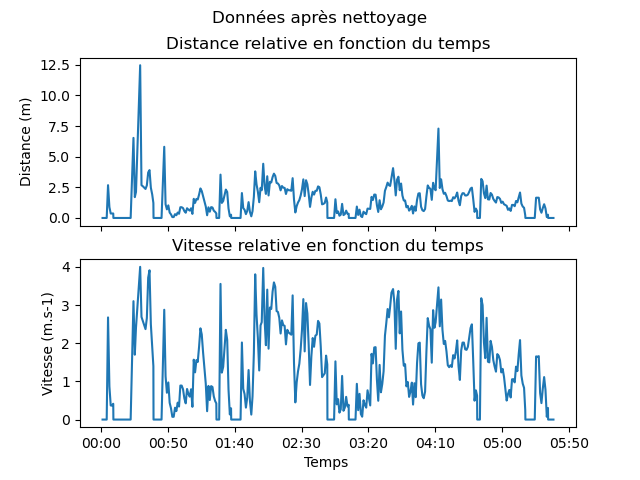

In [23]:
SPEED_THRESHOLD = 4 # m/s

print(f"Nombre de points avant nettoyage\t {sdf.shape[0]}")

# vectorized haversine function
def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

def first_stable_point(x, y, ts):
    distances = dist(x[1:], y[1:],x.shift(), y.shift())
    dts = (ts[1:] - ts.shift()) / 1000
    speeds = distances / dts
    ret = np.argmax(speeds < 6)
    return ret

def invalid_points(x, y, ts):
    i = 0
    j = i + 1

    ret = []
    while j < len(x):
        distance = dist(x[i], y[i], x[j], y[j])
        dt = (ts[j] - ts[i]) / 1000
        speed = distance / dt
        if speed > SPEED_THRESHOLD:
            ret.append(j)
            j += 1
        else:
            j += 1
            i = j - 1
    return ret

first_stable_point_index = first_stable_point(sdf['X'], sdf['Y'], sdf['TS'])
print("Premier point stable: \t ", first_stable_point_index)

if first_stable_point_index > 1:
        sdf.drop(range(0, first_stable_point_index), inplace=True)
        sdf.reset_index(inplace=True, drop=True)

to_del = invalid_points(sdf['X'], sdf['Y'], sdf['TS'])

print("Points erronés: \t", to_del)
sdf.drop(to_del, inplace=True)
sdf.reset_index(inplace=True, drop=True)


# Calcule la distances entre chaque points consecutifs (m).
# On calculera la distance da partir des coordonnées geographiques et cartesiennes 
# afin de verifier le biais introduit par la projection equirectangulaire
sdf['haversine_dist'] = haversine_np(sdf.LONG.shift(), sdf.LAT.shift(),
                 sdf.loc[1:, 'LONG'], sdf.loc[1:, 'LAT']) * 1000

sdf['dist'] = dist(sdf.loc[1:, 'X'], sdf.loc[1:, 'Y'], sdf["X"].shift(), sdf["Y"].shift())

# Calcule le temps écoulé entre chaques point consecutifs en secondes (s)
sdf['dt'] = (sdf.loc[1:, 'TS'] - sdf.TS.shift()) / 1000

# Calcule la vitesse entre chaques point consecutifs en metres par secondes (m.s-1)
sdf['speed'] = sdf['dist'] / sdf['dt']


# Draw the plots
fig, ax = plt.subplots(2, 1, sharex=True)
fig.suptitle("Données après nettoyage")
ax[0].set_title("Distance relative en fonction du temps")
ax[0].plot(sdf['TS'], sdf['dist'])
ax[0].set_ylabel("Distance (m)")
ax[1].plot(sdf['TS'], sdf['speed'])
ax[1].set_ylabel("Vitesse (m.s-1)")
ax[1].set_xlabel("Temps ")
ax[1].set_title("Vitesse relative en fonction du temps")
ax[0].xaxis.set_major_formatter(TIME_FORMATTER)
plt.show()


## Data cleaning

## Détection des arrets

Verifier si un élève est arreté a un instant t peut se resoudre a verifier si la vitesse relative avec le point precedent ou suivant est nulle. Cette methode bien que très simple d'implementation ne prends pas en compte la precision du GPS qui peut intrduire un biais dans la position donnée.

On concidera un arret lorsque l'éleve reste N secondes dans un cercle de rayon R. SI R = 0, cela reviens a utiliser la methode precedente en ajiutant un temps d'arret minimum. En revanche, en agrandissant le rayon R, on peut accepter un mouvent dans une zone réduite, qu'il soit réalisé par l'élève ou du a une imprecision du GPS.

In [25]:
# 
# Smallest enclosing circle - Library (Python)
# 
# Copyright (c) 2020 Project Nayuki
# https://www.nayuki.io/page/smallest-enclosing-circle
# 
# This program is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.
# 
# This program is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
# GNU Lesser General Public License for more details.
# 
# You should have received a copy of the GNU Lesser General Public License
# along with this program (see COPYING.txt and COPYING.LESSER.txt).
# If not, see <http://www.gnu.org/licenses/>.
# 

import math, random


# Data conventions: A point is a pair of floats (x, y). A circle is a triple of floats (center x, center y, radius).

# Returns the smallest circle that encloses all the given points. Runs in expected O(n) time, randomized.
# Input: A sequence of pairs of floats or ints, e.g. [(0,5), (3.1,-2.7)].
# Output: A triple of floats representing a circle.
# Note: If 0 points are given, None is returned. If 1 point is given, a circle of radius 0 is returned.
# 
# Initially: No boundary points known
def make_circle(points):
	# Convert to float and randomize order
	shuffled = [(float(x), float(y)) for (x, y) in points]
	random.shuffle(shuffled)
	
	# Progressively add points to circle or recompute circle
	c = None
	for (i, p) in enumerate(shuffled):
		if c is None or not is_in_circle(c, p):
			c = _make_circle_one_point(shuffled[ : i + 1], p)
	return c


# One boundary point known
def _make_circle_one_point(points, p):
	c = (p[0], p[1], 0.0)
	for (i, q) in enumerate(points):
		if not is_in_circle(c, q):
			if c[2] == 0.0:
				c = make_diameter(p, q)
			else:
				c = _make_circle_two_points(points[ : i + 1], p, q)
	return c


# Two boundary points known
def _make_circle_two_points(points, p, q):
	circ = make_diameter(p, q)
	left  = None
	right = None
	px, py = p
	qx, qy = q
	
	# For each point not in the two-point circle
	for r in points:
		if is_in_circle(circ, r):
			continue
		
		# Form a circumcircle and classify it on left or right side
		cross = _cross_product(px, py, qx, qy, r[0], r[1])
		c = make_circumcircle(p, q, r)
		if c is None:
			continue
		elif cross > 0.0 and (left is None or _cross_product(px, py, qx, qy, c[0], c[1]) > _cross_product(px, py, qx, qy, left[0], left[1])):
			left = c
		elif cross < 0.0 and (right is None or _cross_product(px, py, qx, qy, c[0], c[1]) < _cross_product(px, py, qx, qy, right[0], right[1])):
			right = c
	
	# Select which circle to return
	if left is None and right is None:
		return circ
	elif left is None:
		return right
	elif right is None:
		return left
	else:
		return left if (left[2] <= right[2]) else right


def make_diameter(a, b):
	cx = (a[0] + b[0]) / 2
	cy = (a[1] + b[1]) / 2
	r0 = math.hypot(cx - a[0], cy - a[1])
	r1 = math.hypot(cx - b[0], cy - b[1])
	return (cx, cy, max(r0, r1))


def make_circumcircle(a, b, c):
	# Mathematical algorithm from Wikipedia: Circumscribed circle
	ox = (min(a[0], b[0], c[0]) + max(a[0], b[0], c[0])) / 2
	oy = (min(a[1], b[1], c[1]) + max(a[1], b[1], c[1])) / 2
	ax = a[0] - ox;  ay = a[1] - oy
	bx = b[0] - ox;  by = b[1] - oy
	cx = c[0] - ox;  cy = c[1] - oy
	d = (ax * (by - cy) + bx * (cy - ay) + cx * (ay - by)) * 2.0
	if d == 0.0:
		return None
	x = ox + ((ax*ax + ay*ay) * (by - cy) + (bx*bx + by*by) * (cy - ay) + (cx*cx + cy*cy) * (ay - by)) / d
	y = oy + ((ax*ax + ay*ay) * (cx - bx) + (bx*bx + by*by) * (ax - cx) + (cx*cx + cy*cy) * (bx - ax)) / d
	ra = math.hypot(x - a[0], y - a[1])
	rb = math.hypot(x - b[0], y - b[1])
	rc = math.hypot(x - c[0], y - c[1])
	return (x, y, max(ra, rb, rc))


_MULTIPLICATIVE_EPSILON = 1 + 1e-14

def is_in_circle(c, p):
	return c is not None and math.hypot(p[0] - c[0], p[1] - c[1]) <= c[2] * _MULTIPLICATIVE_EPSILON


# Returns twice the signed area of the triangle defined by (x0, y0), (x1, y1), (x2, y2).
def _cross_product(x0, y0, x1, y1, x2, y2):
	return (x1 - x0) * (y2 - y0) - (y1 - y0) * (x2 - x0)


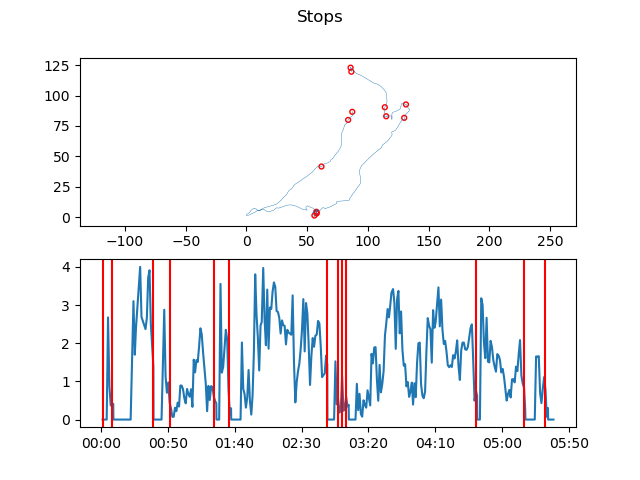

In [26]:
# Rayon du cercle de detection en (m)
STOP_CIRCLE_RADIUS = .3

# Temps d'arret minimum en (ms)
STOP_MIN_TIME = 3000

# A partir d'une ligne de tableau et d'un temps donné, retourne les lignes entre t0 et t0 + time
def get_next_n_sec(df, index, time):
    timestamps = df.TS
    t0 = timestamps[index]
    end_index = np.argmax(timestamps[index:] > t0 + time)
    return df[index:index + end_index]

next_n_sec = [get_next_n_sec(sdf, i, STOP_MIN_TIME) for i in range(sdf.shape[0])]
circles = [make_circle(list(zip(next_n_sec[i]["X"], next_n_sec[i]["Y"]))) if len(next_n_sec[i]) != 1 else None for i in range(sdf.shape[0])]

is_stoped = [circle is not None and circle[2] < STOP_CIRCLE_RADIUS for circle in circles]
stops = [i for i in range(1, len(is_stoped)) if is_stoped[i] and (i == 1 or is_stoped[i - 1] == False)]
stops_circles = [circles[i] for i in stops]
stops_timestamps = [sdf["TS"][i] for i in stops]

sdf["IS_STOPED"] = is_stoped

fig, ax = plt.subplots(2, 1)
fig.suptitle("Stops")
ax[0].axis('equal')

# for circle in circles:
#     if circle is not None and circle[2] < STOP_CIRCLE_RADIUS:
#         ax[0].add_patch(plt.Circle(circle[:2], circle[2] or 2, color='r', fill=False, linewidth=3))
        

for circle in stops_circles:
    ax[0].add_patch(plt.Circle(circle[:2], 2, color='r', fill=False))
ax[0].plot(sdf["X"], sdf["Y"], linewidth=0.3)

ax[1].plot( sdf["TS"], sdf["speed"])
ax[1].xaxis.set_major_formatter(TIME_FORMATTER)
[ax[1].axvline(ts, color='r') for ts in stops_timestamps]
plt.show()

## Validation des balises

Une basise est considérée comme validées lorsque l'élève passe dans un rayon R de la balise.

In [27]:
# BEACONS = [
#     [1, 48.8124241, 2.1829787],
#     [2, 48.8118271, 2.1830392],
#     [3,	48.8112972,	2.1838760],
#     [4,	48.8108945,	2.1851528]
# ]

BEACONS = [
    [1, 48.8938208, 2.3883543],
    [16, 48.8949879, 2.3907824],
    [17, 48.8929774, 2.3879819],
    [18, 48.8928159, 2.3868641],
    [21, 48.8935197, 2.3876138],
    [7, 48.8941464, 2.3861955],
    [9, 48.8939147, 2.3884367],
    [13, 48.8932153, 2.3885151],
    [14, 48.8944649, 2.3890872],
    [15, 48.8947393, 2.3902093],
]

beacons_df = pd.DataFrame(BEACONS, columns=["id", "lat", "lng"])
beacons_df

,id,lat,lng
0,1,48.893821,2.388354
1,16,48.894988,2.390782
2,17,48.892977,2.387982
3,18,48.892816,2.386864
4,21,48.893520,2.387614
5,7,48.894146,2.386195
6,9,48.893915,2.388437
7,13,48.893215,2.388515
8,14,48.894465,2.389087
9,15,48.894739,2.390209


In [28]:
BEACON_RADIUS_M = 10
points_arr =  list(zip(sdf["LAT"], sdf["LONG"], sdf["TS"]))

# format the beacon data to feed into the evaluate_beacon() function
beacon_dict = [{"id": b[0], "name": b[0], "coords": [b[2], b[1]]} for b in BEACONS]

results = evaluate_beacon(points_arr, beacon_dict, BEACON_RADIUS_M=BEACON_RADIUS_M)

# Copy the results to the dataframe
for beacon in results:
    for key, val in beacon.items():
        if key == "coords": continue
        beacons_df.loc[beacons_df['id'] == beacon["id"], key] = val

beacons_df.style.applymap(
    lambda val: 'color: green' if val else 'color: red',
    subset=['valided']
    )

,id,lat,lng,valided,name,avgSpeed,time,timestamp,index,lap
0,1,48.893821,2.388354,True,1.000000,4.969239,313.000000,313372.000000,350.000000,nan
1,16,48.894988,2.390782,False,16.000000,nan,nan,0.000000,0.000000,nan
2,17,48.892977,2.387982,True,17.000000,7.098006,167.004000,167376.000000,194.000000,nan
3,18,48.892816,2.386864,False,18.000000,nan,nan,0.000000,0.000000,nan
4,21,48.893520,2.387614,False,21.000000,nan,nan,0.000000,0.000000,nan
5,7,48.894146,2.386195,False,7.000000,nan,nan,0.000000,0.000000,nan
6,9,48.893915,2.388437,False,9.000000,nan,nan,0.000000,0.000000,nan
7,13,48.893215,2.388515,True,13.000000,3.556858,137.005000,137377.000000,164.000000,nan
8,14,48.894465,2.389087,False,14.000000,nan,nan,0.000000,0.000000,nan
9,15,48.894739,2.390209,False,15.000000,nan,nan,0.000000,0.000000,nan


## Visualisation sur la carte

In [31]:
geojson_lines = []
end_time = points_arr[-1][2]

# Create each line
for i in range(len(points_arr) - 1):
    geojson_lines.append({
        "coordinates": [
            [points_arr[i][1], points_arr[i][0]],
            [points_arr[i + 1][1], points_arr[i + 1][0]],
        ],
        "dates": [points_arr[i][2] + 1653343200000, points_arr[i + 1][2] + 1653343200000],
        "color": "red",
    })

# Create a feature from each line
features = [
    {
        "type": "Feature",
        "geometry": {
            "type": "LineString",
            "coordinates": line["coordinates"],
        },
        "properties": {
            "times": line["dates"],
            "style": {
                "color": line["color"],
                "weight": line["weight"] if "weight" in line else 5,
            },
        },
    }
    for line in geojson_lines
]

# Generate the beacon markers
for b in beacons_df[['id', 'lat', 'lng', 'timestamp', 'valided']].itertuples():

    # Add a red marker for every beacon
    features.append({
            "type": "Feature",
            "geometry": {
                "type": "Point",
                "coordinates": [b.lng, b.lat],
            },
            "properties": {
                "times": 0,
                'icon': 'circle', 'iconstyle': {'color': 'red', "radius": 10}
            },
        })
    
    # If the beacon was valided, add a green marker over the red one at the correct timestamp
    if b.valided:
        features.append({
                "type": "Feature",
                "geometry": {
                    "type": "Point",
                    "coordinates": [b.lng, b.lat],
                },
                "properties": {
                    "times": [b.timestamp + 1653343200000],
                    'icon': 'circle', 'iconstyle': {'color': 'green', "radius": 10}
                },
            })

for stop in stops:
    # print(sdf[["LAT", "LONG", "TS"]].iloc[stop])
    row = sdf[["LAT", "LONG", "TS"]].iloc[stop]
    features.append({
                "type": "Feature",
                "geometry": {
                    "type": "Point",
                    "coordinates": [row.LONG, row.LAT],
                },
                "properties": {
                    "times": [row.TS + 1653343200000],
                    'icon': 'circle', 'iconstyle': {'color': 'blue', "radius": 3}
                },
            })

import folium.plugins as plugins

f = folium.Figure(width=1000, height=500)
m = folium.Map()
f.add_child(m)

geojson = plugins.TimestampedGeoJson(
    {
        "type": "FeatureCollection",
        "features": features,
    },
    period="PT1S",
    add_last_point=False,
    transition_time=100,
    
).add_to(m)

m.fit_bounds(geojson.get_bounds())

f

## Visualisation 3D

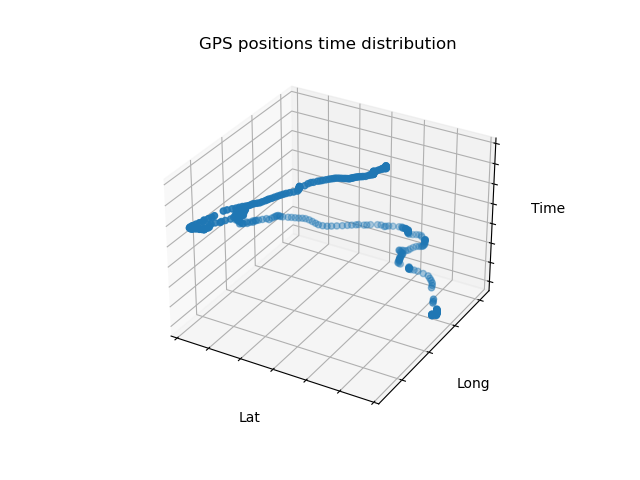

In [32]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

xs = [p[0] for p in points_arr]
ys = [p[1] for p in points_arr]
zs = [p[2] for p in points_arr]
ax.scatter(xs, ys, zs, marker='o')
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
ax.set_xlabel('Lat')
ax.set_ylabel('Long')
ax.set_zlabel('Time')
ax.set_title("GPS positions time distribution")

plt.show()

## Statistiques

In [34]:
chrono_s = (sdf["TS"].iloc[-1] - sdf["TS"].iloc[0]) // 1000
chrono_formatted = time.strftime('%M:%S', time.gmtime(chrono_s))
total_dist = round(sdf["dist"].sum())
avg_speed_with_stops = round(sdf["speed"].mean(), 2)
avg_speed_without_stops = round(sdf[sdf["IS_STOPED"] == False]["speed"].mean(), 2)
min_speed = round(sdf["speed"].min(), 3)
max_speed = round(sdf["speed"].max(), 3)
delta_speed = max_speed - min_speed

print(f'{"Chrono (s)" :40} {chrono_s}')
print(f'{"Chrono (min:sec)" :40} {chrono_formatted}')
print(f'{"Distance Totale (m)" :40} {total_dist}')
print(f'{"Vitesse moy. avec arrets (m/s)" :40} {avg_speed_with_stops}')
print(f'{"Vitesse moy. sans arrets (m/s)" :40} {avg_speed_without_stops}')
print(f'{"Vitesse min (m/s)" :40} {min_speed}')
print(f'{"Vitesse max (m/s)" :40} {max_speed}')
print(f'{"Delta vitesse (m/s)" :40} {delta_speed}')



Chrono (s)                               337
Chrono (min:sec)                         05:37
Distance Totale (m)                      452
Vitesse moy. avec arrets (m/s)           1.12
Vitesse moy. sans arrets (m/s)           1.44
Vitesse min (m/s)                        0.0
Vitesse max (m/s)                        4.0
Delta vitesse (m/s)                      4.0
